In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('netstats_4_2.csv')
df = df.drop(columns=['Unnamed: 0'])
df['ts'] = pd.to_datetime(df['ts'])

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import random

### Helper functions

### Dataset clean up

In [4]:
site_host_list = list(df['site_host'].unique())

### EDA
- time series charts per site / host
- histogram per site / host
- box plot per site / host
- scatter plots site vs host
<br>

*Data is in 5 minute increments*

**5 minute increments**

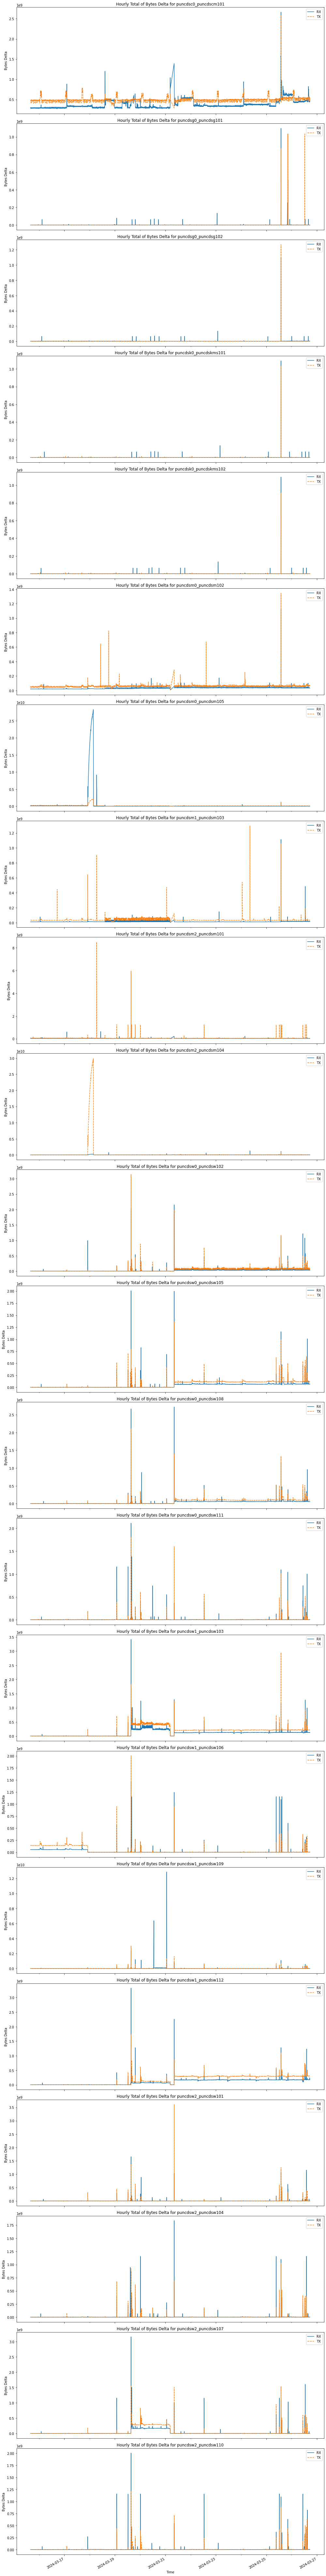

In [5]:
n = len(site_host_list)  # Number of site-host combinations

fig, axs = plt.subplots(n, 1, figsize=(14, 5 * n), sharex=True)  # Adjust the figure size as needed

for i, site_host_key in enumerate(site_host_list):
    # Filter the dataset for the current site-host combination
    sample_data = df[df['site_host'] == site_host_key]
    # Set 'ts' as the index
    sample_data = sample_data.set_index('ts')

    # don't resample Resample data to hourly totals to smooth out the series and make patterns more observable
    #hourly_data = sample_data.resample('H').sum()
    hourly_data = sample_data.copy()
    
    # If there's only one site-host combination, 'axs' will not be an array
    ax = axs[i] if n > 1 else axs

    # Plotting both 'rx_bytes_delta' and 'tx_bytes_delta' on the same subplot for the current site-host
    hourly_data['rx_bytes_delta'].plot(ax=ax, label='RX', legend=True)
    hourly_data['tx_bytes_delta'].plot(ax=ax, label='TX', legend=True, linestyle='--')  # Dashed line for TX

    ax.set_title(f'Hourly Total of Bytes Delta for {site_host_key}')
    ax.set_ylabel('Bytes Delta')
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

look at last 300 observations

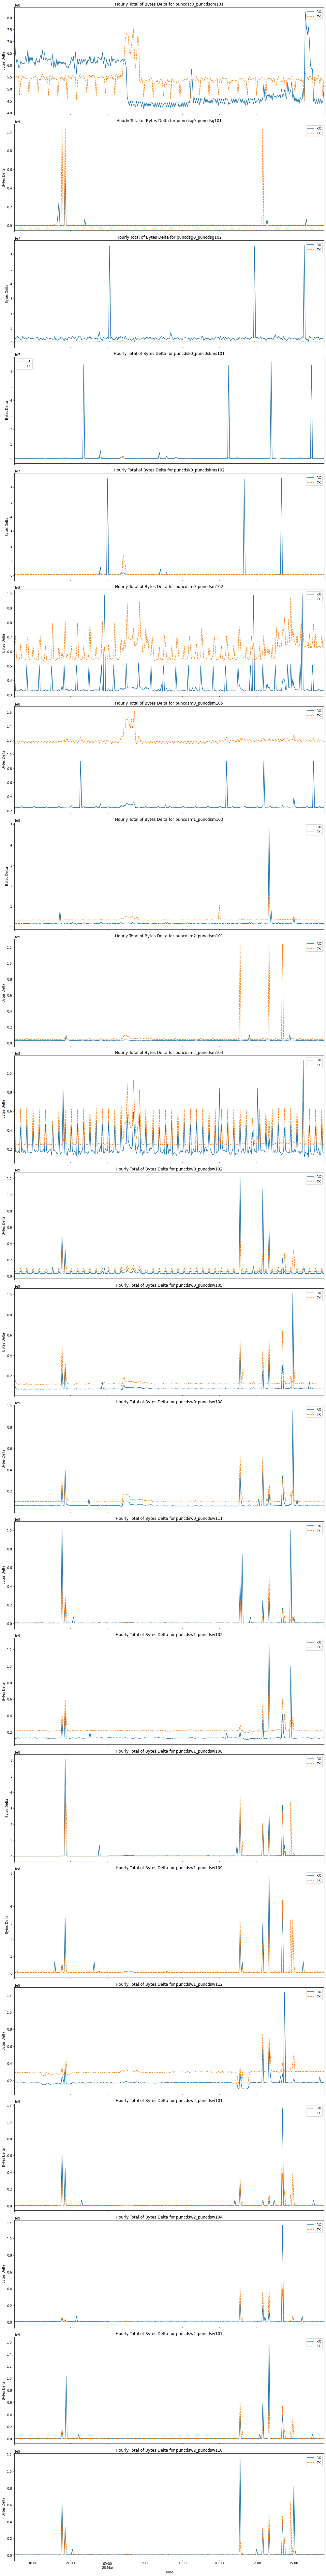

In [6]:
n = len(site_host_list)  # Number of site-host combinations

fig, axs = plt.subplots(n, 1, figsize=(14, 5 * n), sharex=True)  # Adjust the figure size as needed

for i, site_host_key in enumerate(site_host_list):
    # Filter the dataset for the current site-host combination
    sample_data = df[df['site_host'] == site_host_key]
    # Set 'ts' as the index
    sample_data = sample_data.set_index('ts')

    # don't resample Resample data to hourly totals to smooth out the series and make patterns more observable
    #hourly_data = sample_data.resample('H').sum()
    hourly_data = sample_data.copy()
    
    # If there's only one site-host combination, 'axs' will not be an array
    ax = axs[i] if n > 1 else axs

    # Plotting both 'rx_bytes_delta' and 'tx_bytes_delta' on the same subplot for the current site-host
    hourly_data.tail(300)['rx_bytes_delta'].plot(ax=ax, label='RX', legend=True)
    hourly_data.tail(300)['tx_bytes_delta'].plot(ax=ax, label='TX', legend=True, linestyle='--')  # Dashed line for TX

    ax.set_title(f'Hourly Total of Bytes Delta for {site_host_key}')
    ax.set_ylabel('Bytes Delta')
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()


**Histograms 5 Min increments **

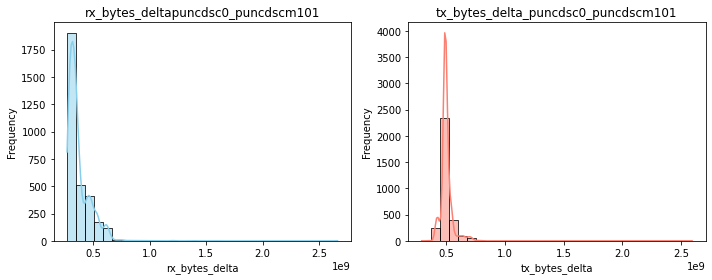

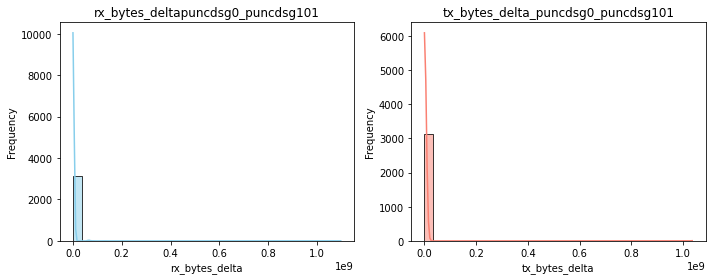

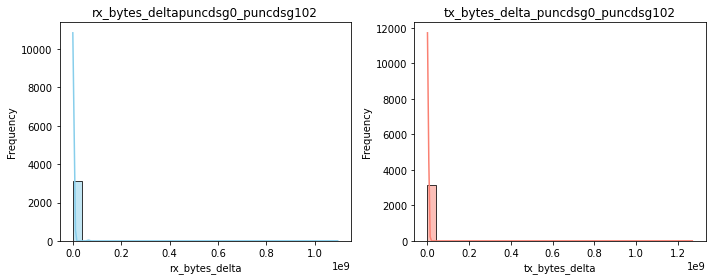

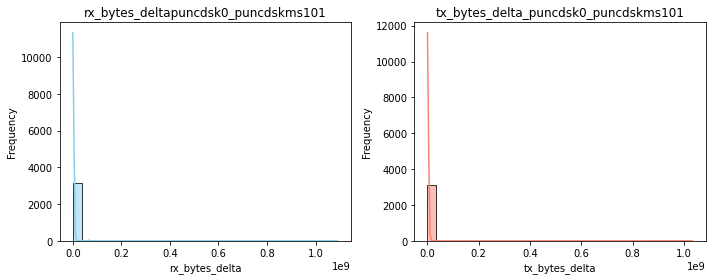

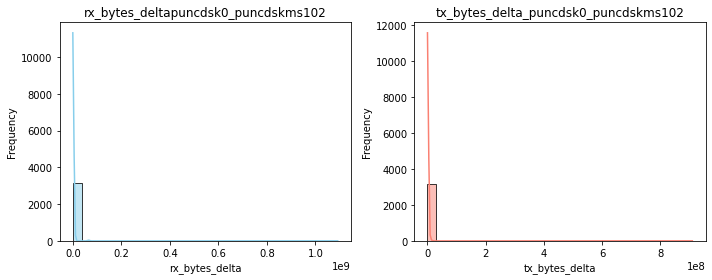

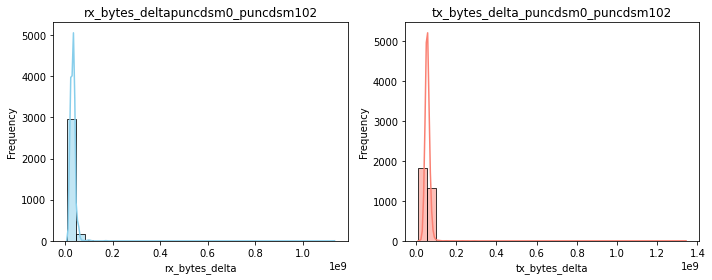

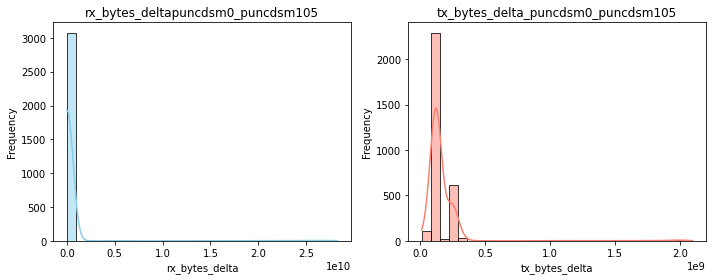

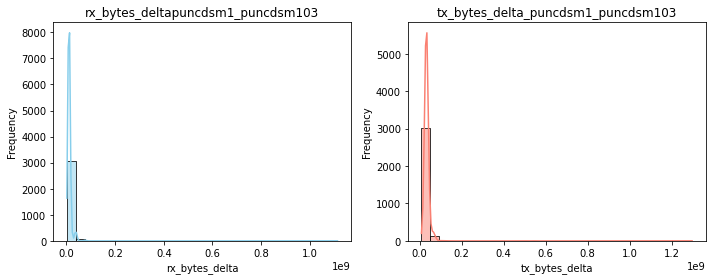

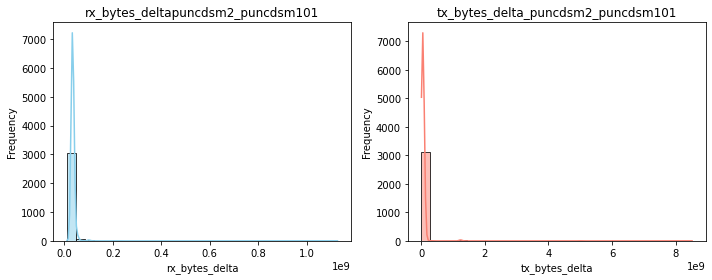

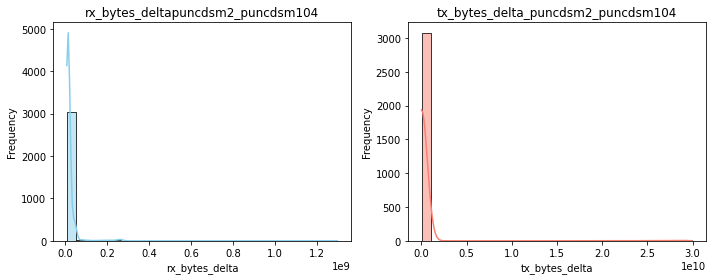

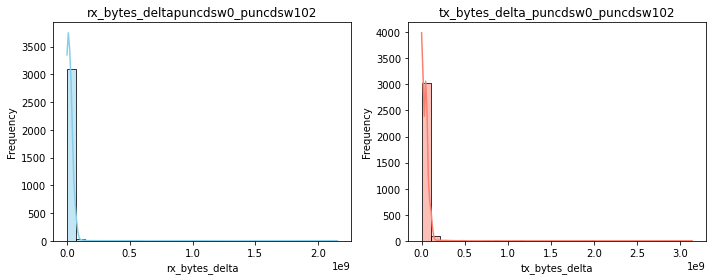

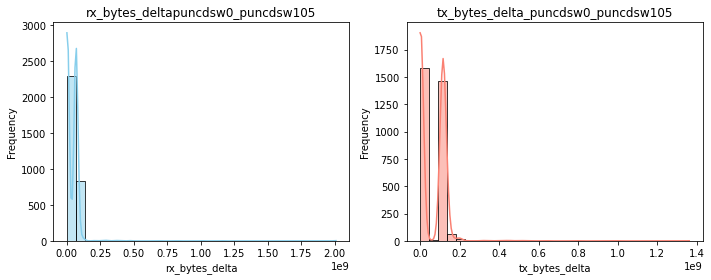

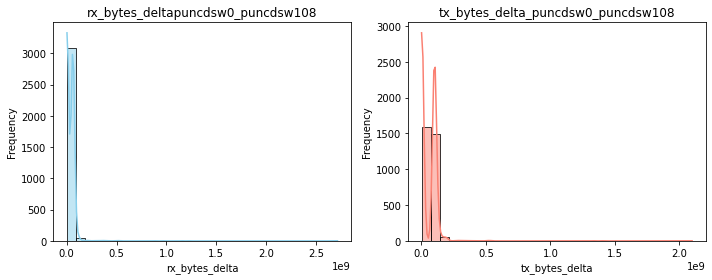

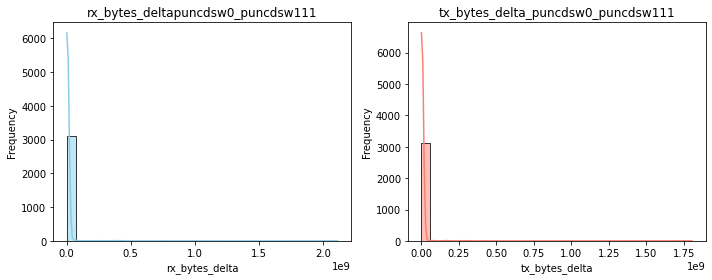

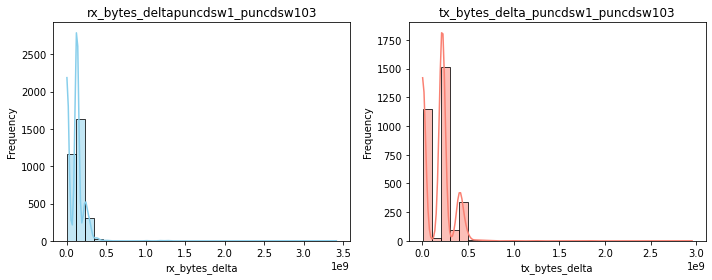

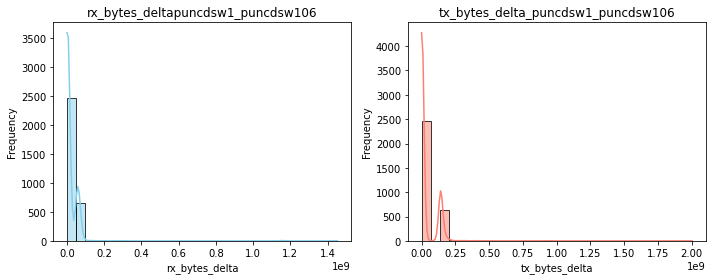

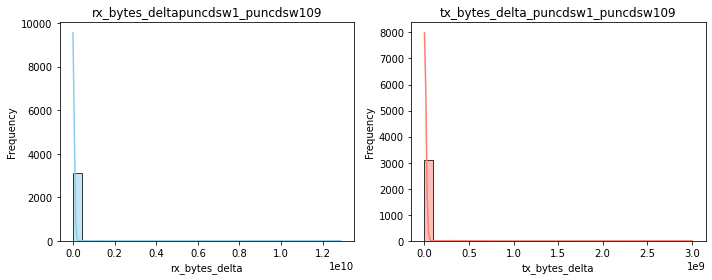

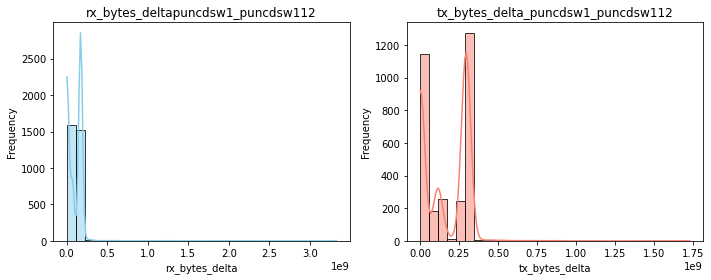

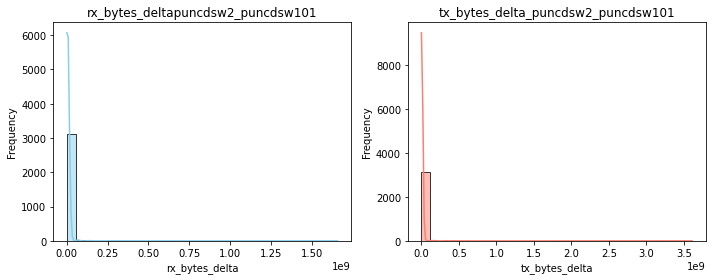

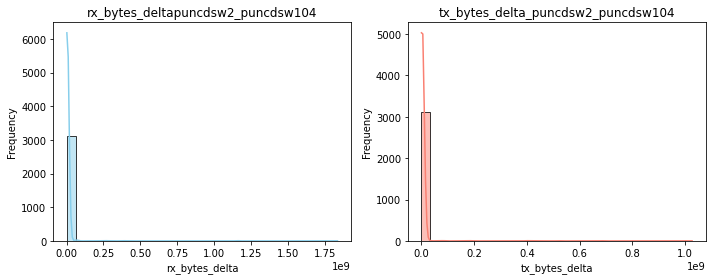

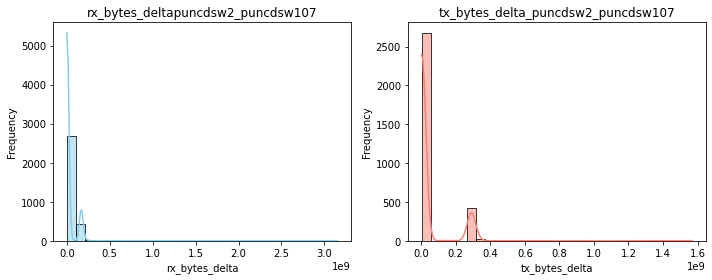

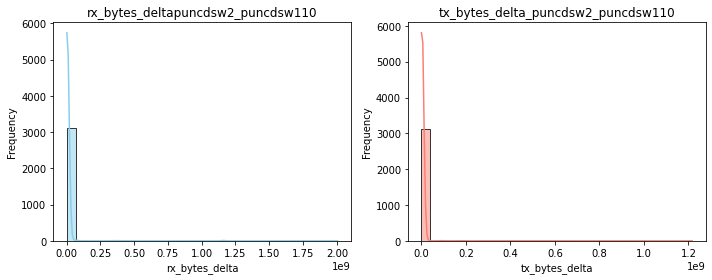

In [13]:
for i, site_host_key in enumerate(site_host_list):
    # Filter the dataset for the current site-host combination
    sample_data = df[df['site_host'] == site_host_key]
    # Set 'ts' as the index
    sample_data = sample_data.set_index('ts')
    # Histograms for rx_bytes_delta and tx_bytes_delta
    plt.figure(figsize=(10, 4))
    
    # Histogram for rx_bytes_delta
    plt.subplot(1, 2, 1)
    sns.histplot(sample_data['rx_bytes_delta'], bins=30, kde=True, color='skyblue')
    chart_title = 'rx_bytes_delta'+site_host_key
    plt.title(chart_title)
    plt.xlabel('rx_bytes_delta')
    plt.ylabel('Frequency')
    
    # Histogram for tx_bytes_delta
    plt.subplot(1, 2, 2)
    sns.histplot(sample_data['tx_bytes_delta'], bins=30, kde=True, color='salmon')
    chart_title = 'tx_bytes_delta_'+site_host_key
    plt.title(chart_title)
    plt.xlabel('tx_bytes_delta')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

**Histograms 1 hour increments**

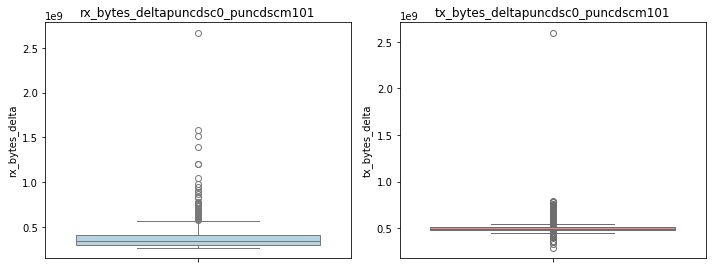

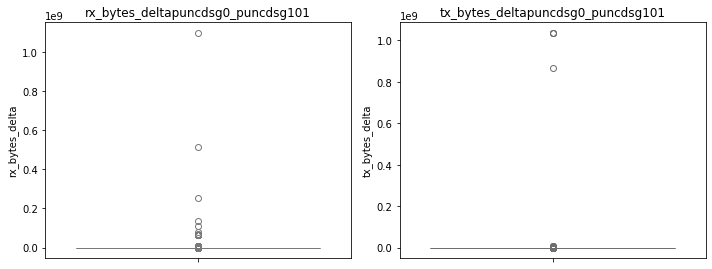

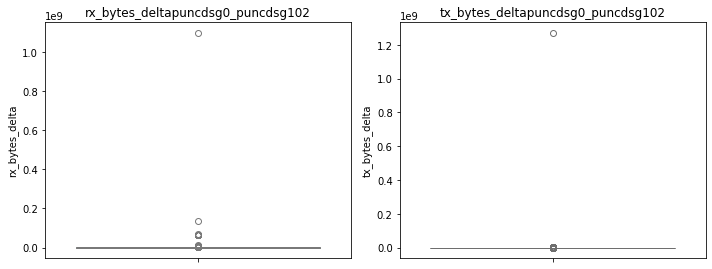

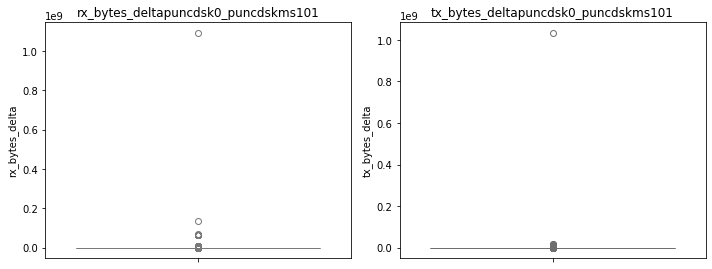

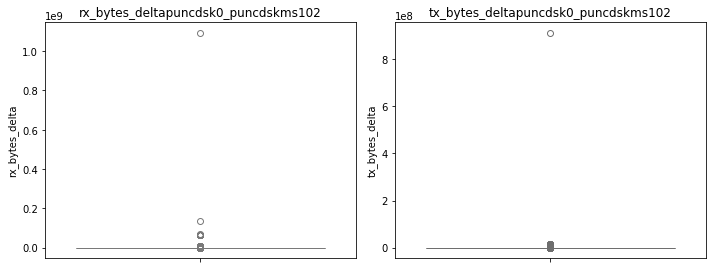

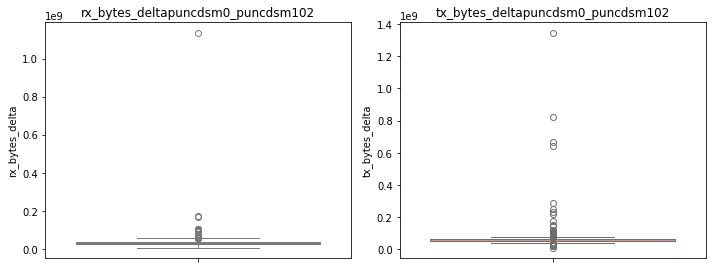

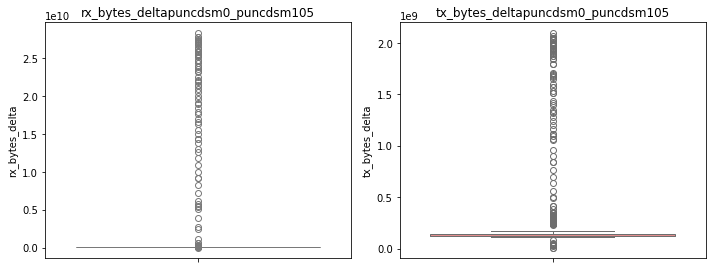

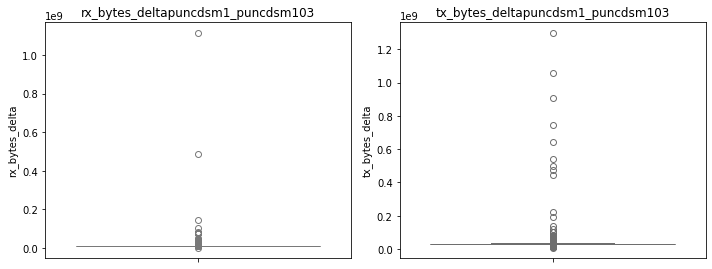

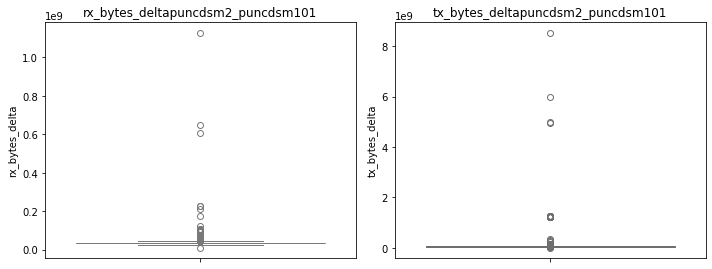

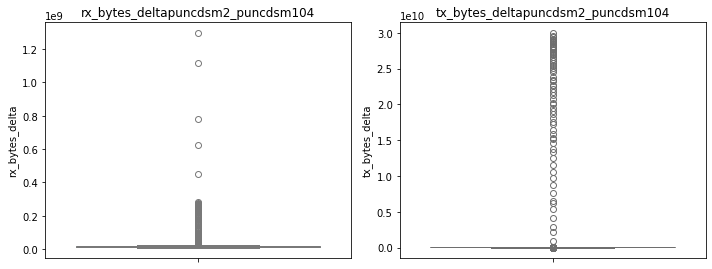

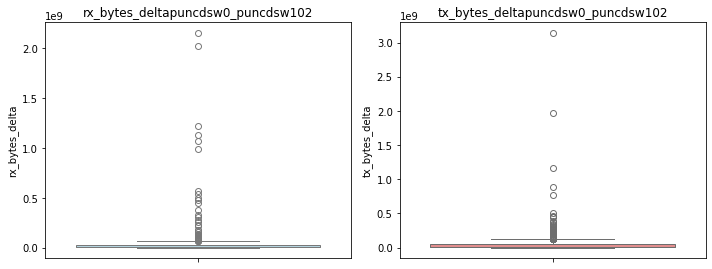

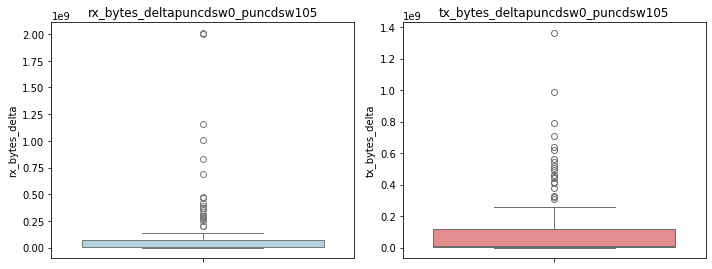

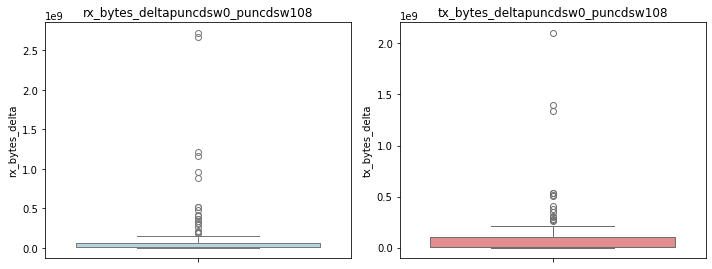

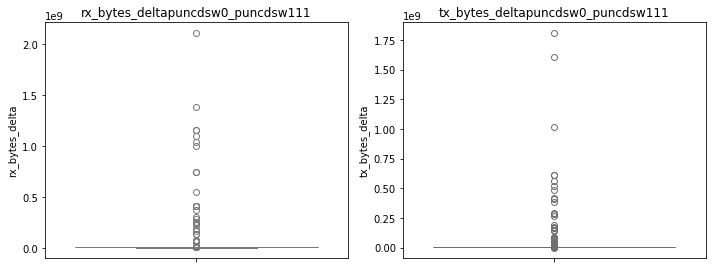

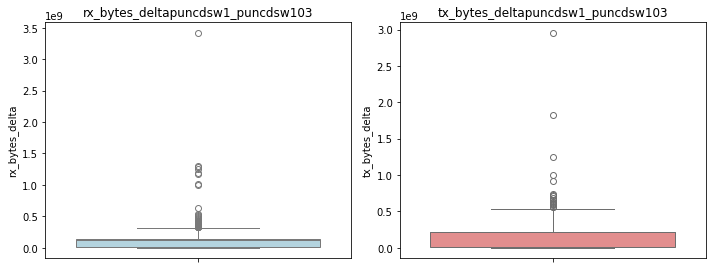

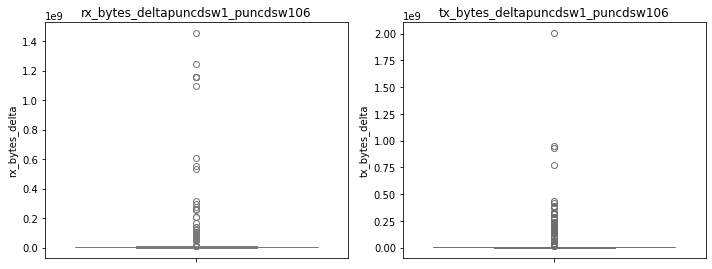

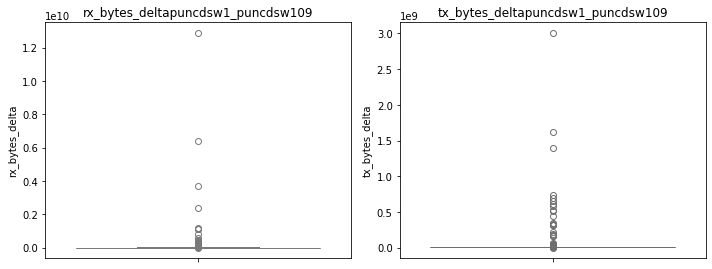

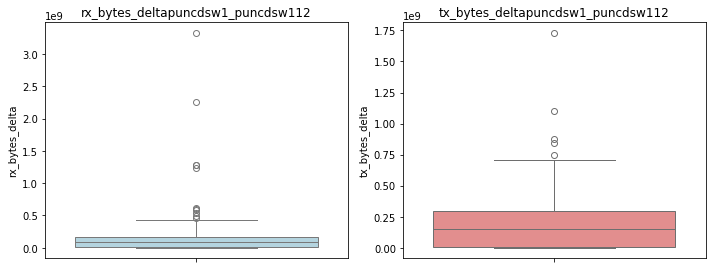

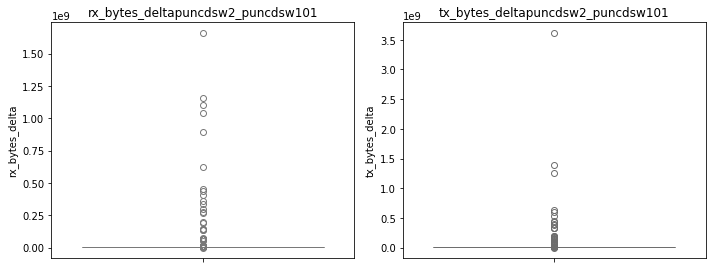

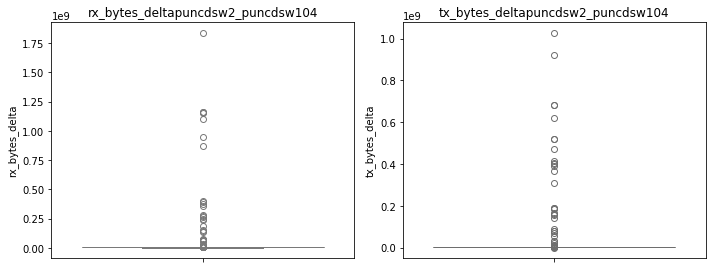

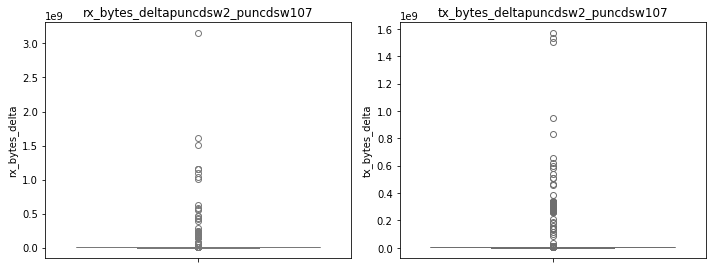

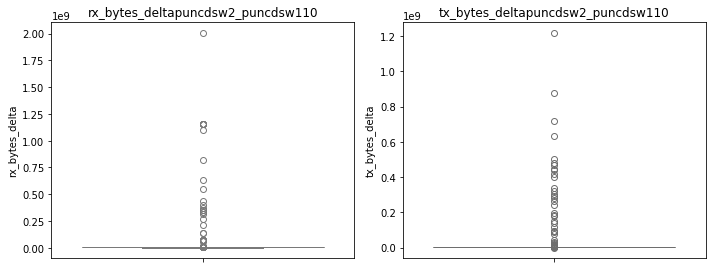

In [8]:
# Box plots for rx_bytes_delta and tx_bytes_delta to visualize outliers
for i, site_host_key in enumerate(site_host_list):
    # Filter the dataset for the current site-host combination
    sample_data = df[df['site_host'] == site_host_key]
    # Set 'ts' as the index
    sample_data = sample_data.set_index('ts')
    # Histograms for rx_bytes_delta and tx_bytes_delta
    plt.figure(figsize=(10, 4))
    
    # Box plot for rx_bytes_delta
    plt.subplot(1, 2, 1)
    sns.boxplot(y=sample_data['rx_bytes_delta'], color='lightblue')
    chart_title = 'rx_bytes_delta'+site_host_key
    plt.title(chart_title)
    plt.ylabel('rx_bytes_delta')
    
    # Box plot for tx_bytes_delta
    plt.subplot(1, 2, 2)
    sns.boxplot(y=sample_data['tx_bytes_delta'], color='lightcoral')
    chart_title = 'tx_bytes_delta'+site_host_key
    plt.title(chart_title)
    plt.ylabel('tx_bytes_delta')
    
    plt.tight_layout()
    plt.show()

<Figure size 720x288 with 0 Axes>

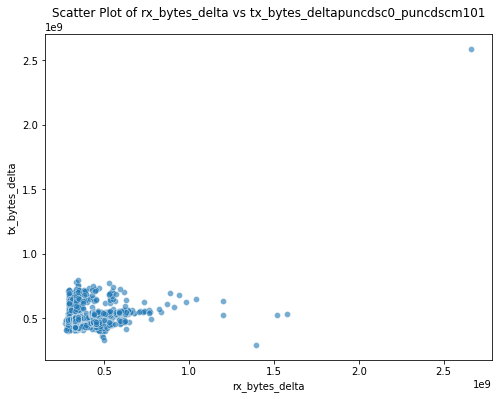

<Figure size 720x288 with 0 Axes>

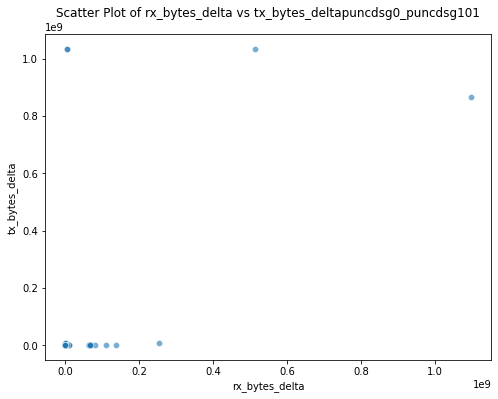

<Figure size 720x288 with 0 Axes>

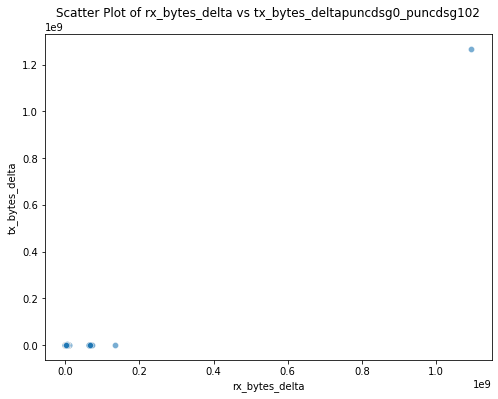

<Figure size 720x288 with 0 Axes>

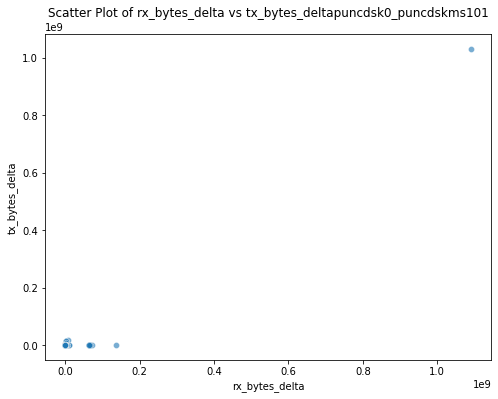

<Figure size 720x288 with 0 Axes>

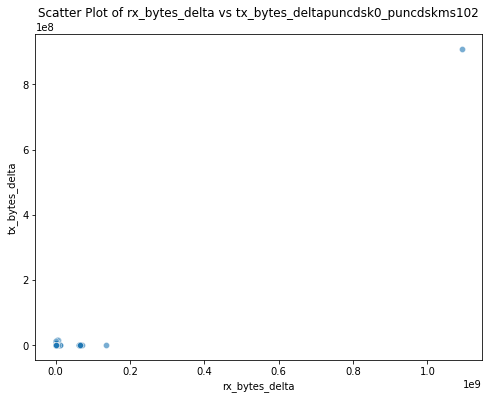

<Figure size 720x288 with 0 Axes>

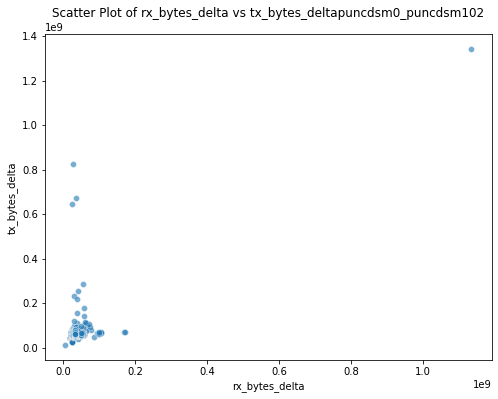

<Figure size 720x288 with 0 Axes>

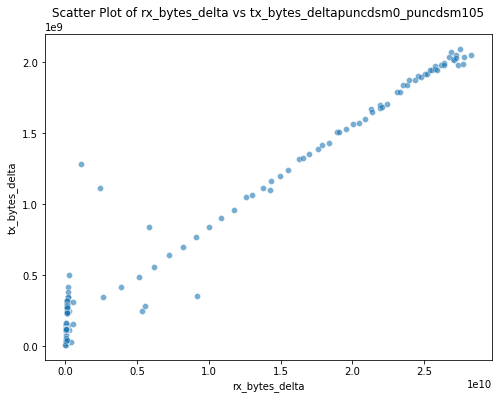

<Figure size 720x288 with 0 Axes>

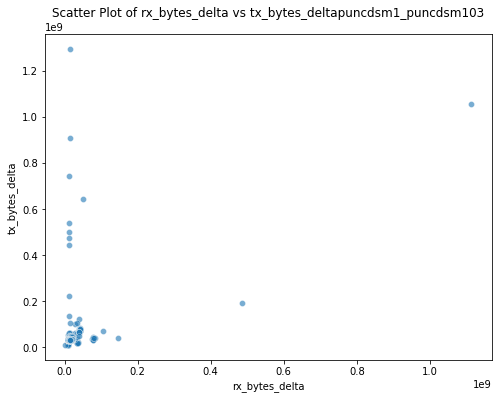

<Figure size 720x288 with 0 Axes>

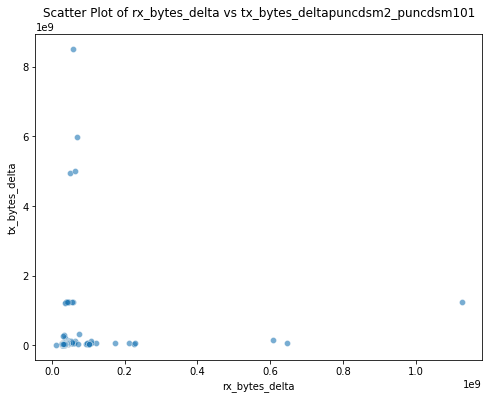

<Figure size 720x288 with 0 Axes>

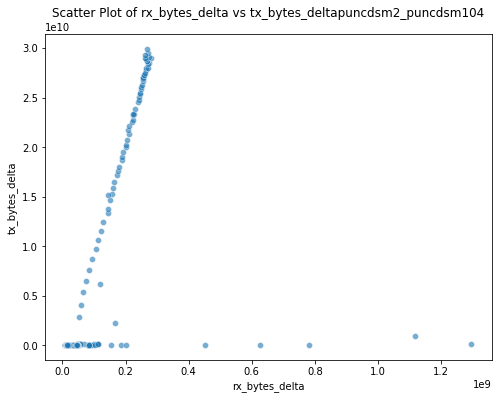

<Figure size 720x288 with 0 Axes>

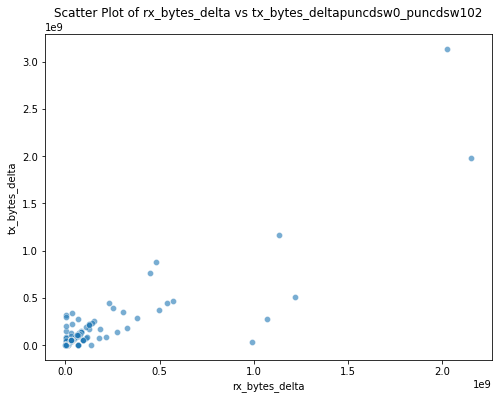

<Figure size 720x288 with 0 Axes>

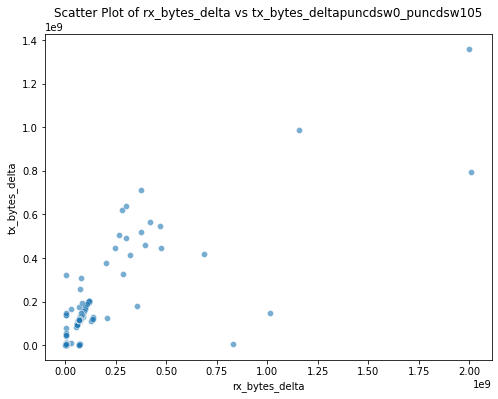

<Figure size 720x288 with 0 Axes>

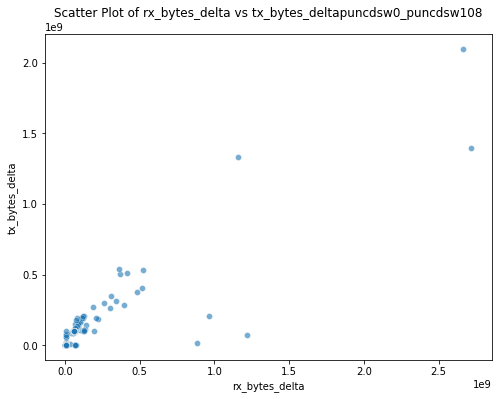

<Figure size 720x288 with 0 Axes>

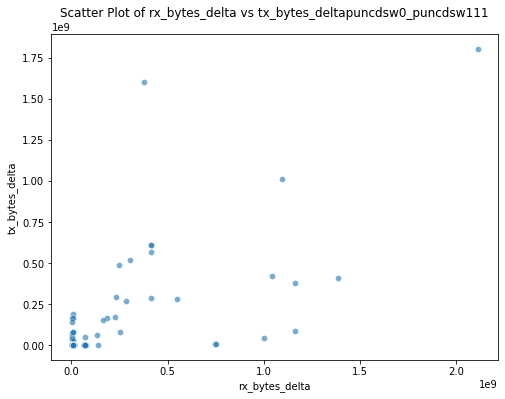

<Figure size 720x288 with 0 Axes>

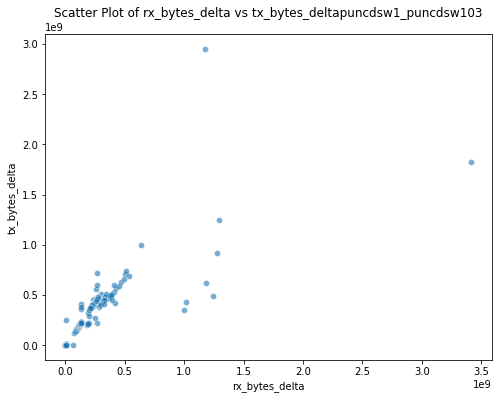

<Figure size 720x288 with 0 Axes>

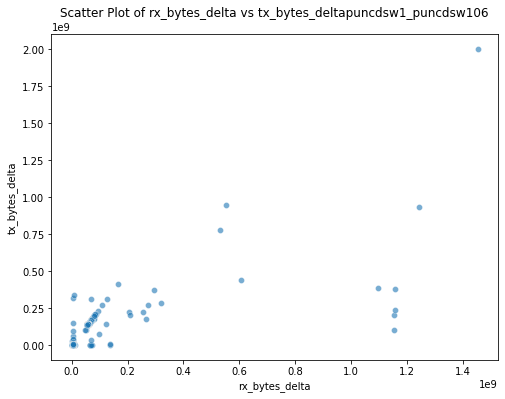

<Figure size 720x288 with 0 Axes>

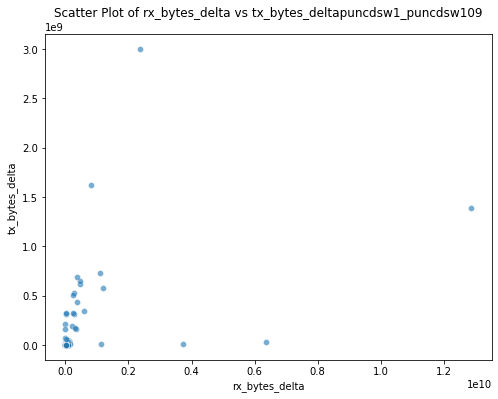

<Figure size 720x288 with 0 Axes>

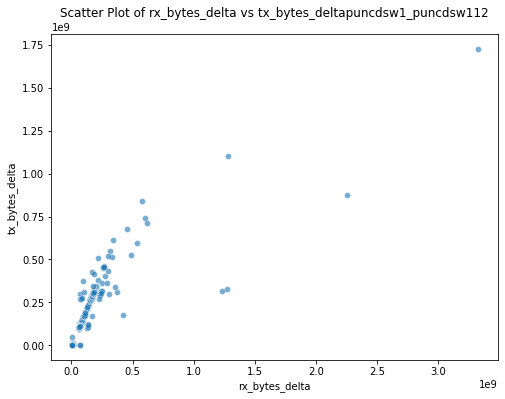

<Figure size 720x288 with 0 Axes>

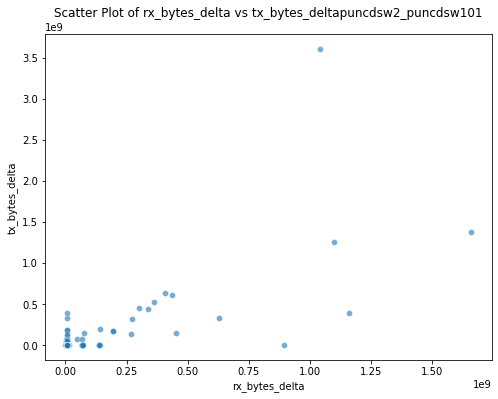

<Figure size 720x288 with 0 Axes>

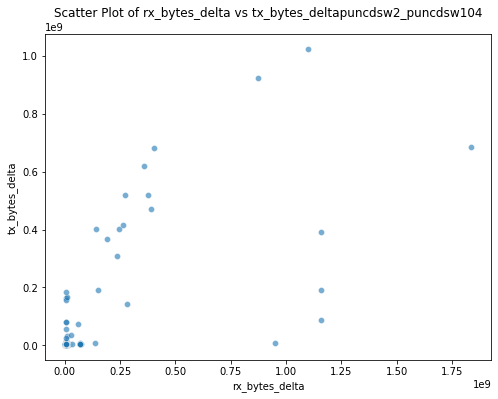

<Figure size 720x288 with 0 Axes>

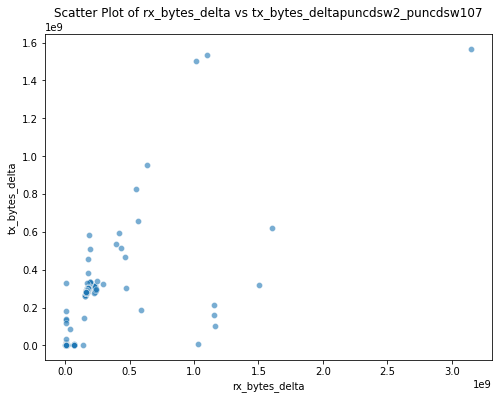

<Figure size 720x288 with 0 Axes>

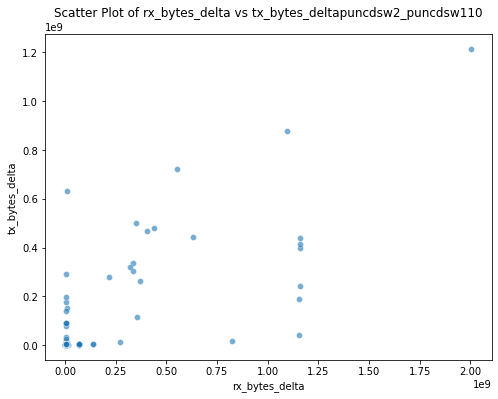

In [9]:
# Box plots for rx_bytes_delta and tx_bytes_delta to visualize outliers
for i, site_host_key in enumerate(site_host_list):
    # Filter the dataset for the current site-host combination
    sample_data = df[df['site_host'] == site_host_key]
    # Set 'ts' as the index
    sample_data = sample_data.set_index('ts')
    # Histograms for rx_bytes_delta and tx_bytes_delta
    plt.figure(figsize=(10, 4))   
    
    # Scatter plot to visualize the relationship between rx_bytes_delta and tx_bytes_delta
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='rx_bytes_delta', y='tx_bytes_delta', data=sample_data, alpha=0.6)
    chart_title = 'Scatter Plot of rx_bytes_delta vs tx_bytes_delta'+site_host_key
    plt.title(chart_title)
    plt.xlabel('rx_bytes_delta')
    plt.ylabel('tx_bytes_delta')
    plt.show()

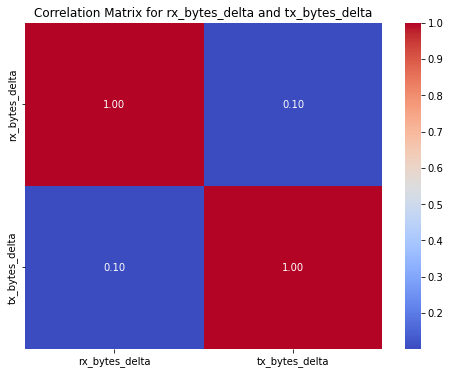

In [10]:
#Correlation Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis for numerical columns
correlation_matrix = df[['rx_bytes_delta', 'tx_bytes_delta']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for rx_bytes_delta and tx_bytes_delta')
plt.show()


*Correlation analyis done as a whole, to test correlation. No further drill down. Correlation exists but fairly low*

#### Remove Site/Host Combinations 1st cut
*based on charts above, these combinations are not suitable be trained on*

In [11]:
# based on charts above, these combinations are not suitable be trained on 
remove_list = ['puncdsm2_puncdsm104','puncdsm0_puncdsm105','puncdsk0_puncdskms102',\
 'puncdsk0_puncdskms101', 'puncdsg0_puncdsg101', 'puncdsg0_puncdsg102']

keep_list = site_host_list.copy()
for comb in remove_list:
        print('removing comb',comb)
        keep_list.remove(comb)

removing comb puncdsm2_puncdsm104
removing comb puncdsm0_puncdsm105
removing comb puncdsk0_puncdskms102
removing comb puncdsk0_puncdskms101
removing comb puncdsg0_puncdsg101
removing comb puncdsg0_puncdsg102


In [16]:
len(keep_list)

16

### Hourly data

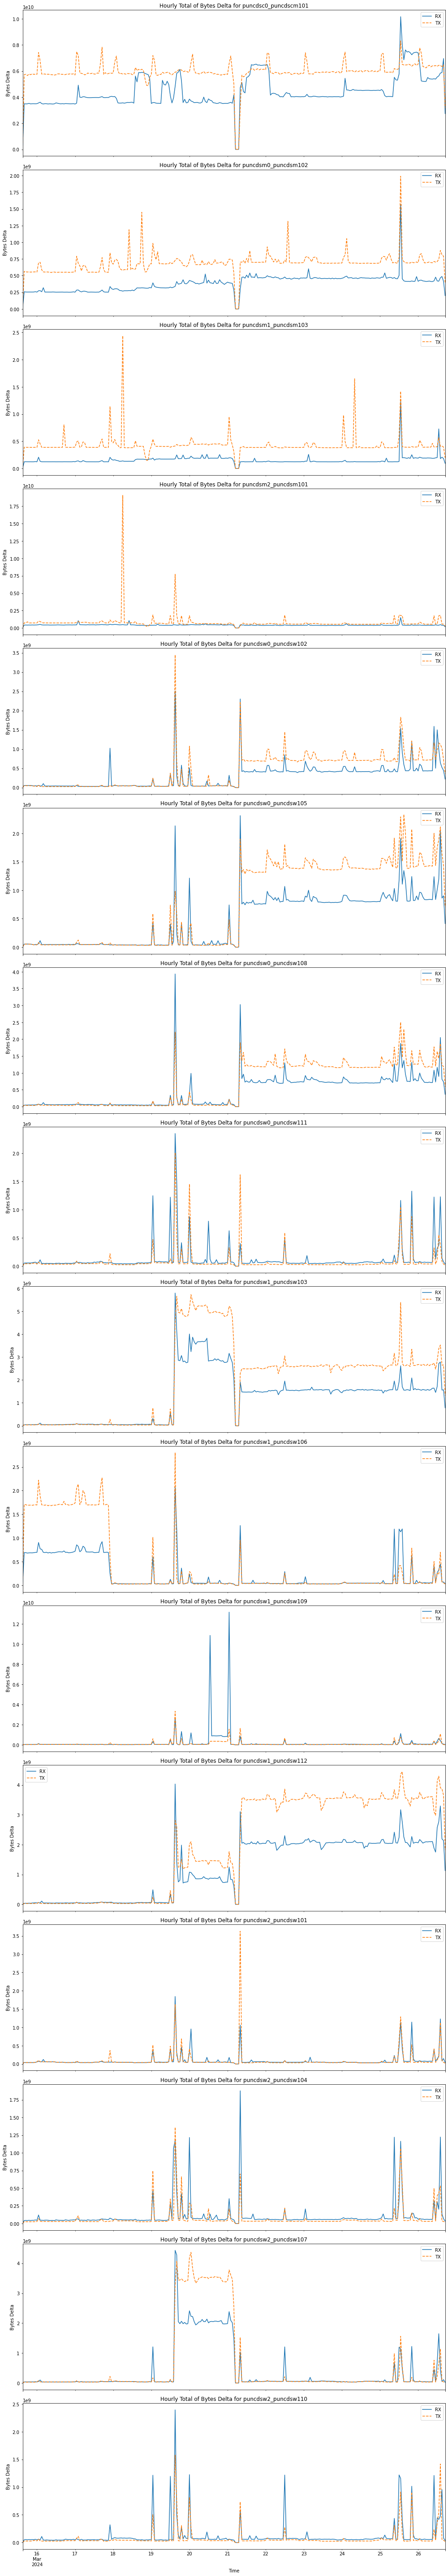

In [17]:
n = len(keep_list)  # Number of site-host combinations

fig, axs = plt.subplots(n, 1, figsize=(14, 5 * n), sharex=True)  # Adjust the figure size as needed

for i, site_host_key in enumerate(keep_list):
    # Filter the dataset for the current site-host combination
    sample_data = df[df['site_host'] == site_host_key]
    # Set 'ts' as the index
    sample_data = sample_data.set_index('ts')

    # Resample data to hourly totals to smooth out the series and make patterns more observable
    hourly_data = sample_data.resample('H').sum()

    # If there's only one site-host combination, 'axs' will not be an array
    ax = axs[i] if n > 1 else axs

    # Plotting both 'rx_bytes_delta' and 'tx_bytes_delta' on the same subplot for the current site-host
    hourly_data['rx_bytes_delta'].plot(ax=ax, label='RX', legend=True)
    hourly_data['tx_bytes_delta'].plot(ax=ax, label='TX', legend=True, linestyle='--')  # Dashed line for TX

    ax.set_title(f'Hourly Total of Bytes Delta for {site_host_key}')
    ax.set_ylabel('Bytes Delta')
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

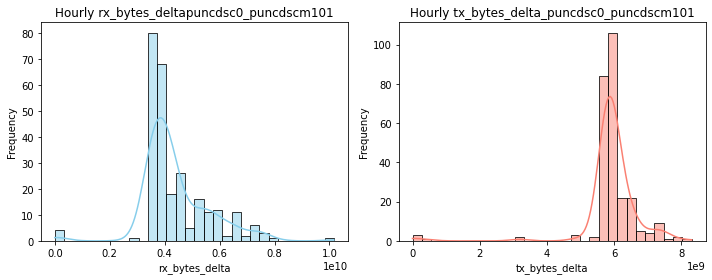

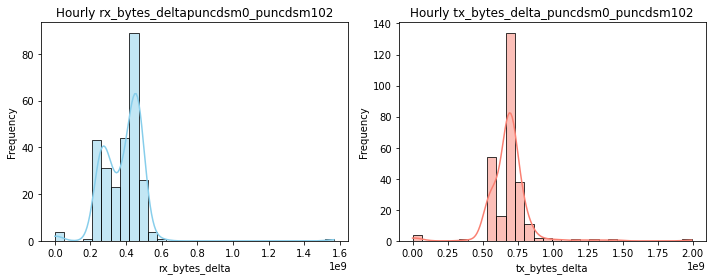

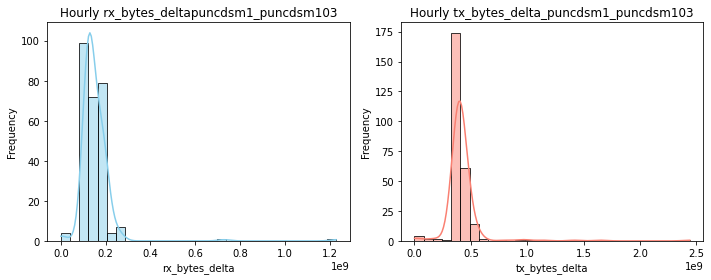

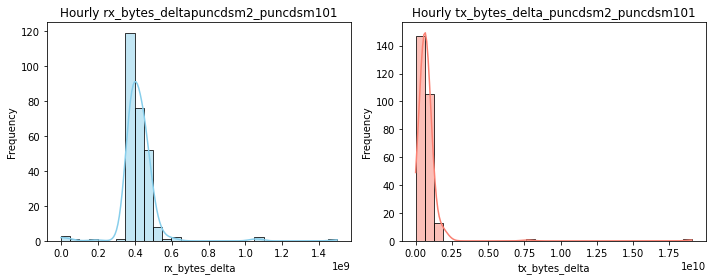

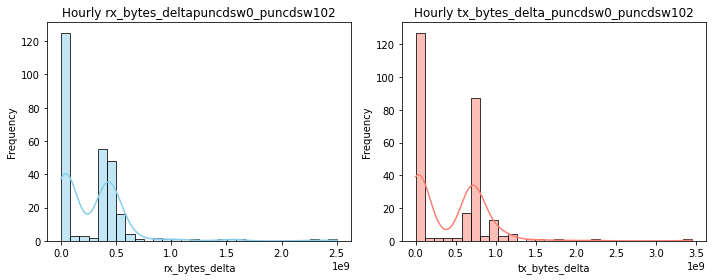

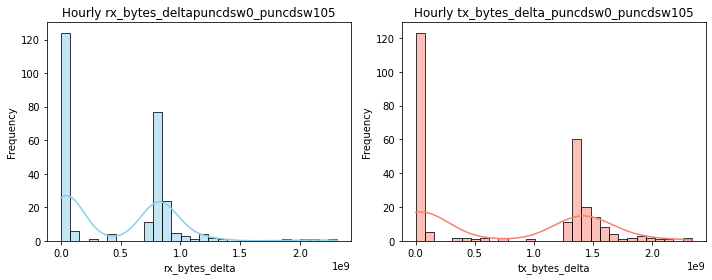

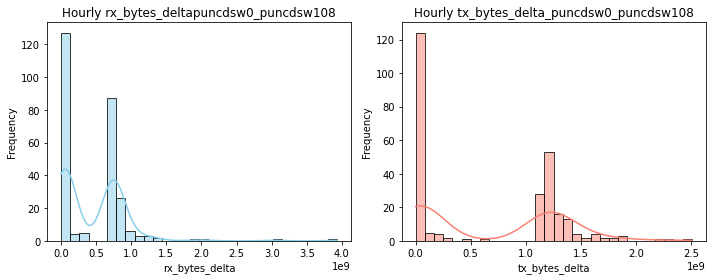

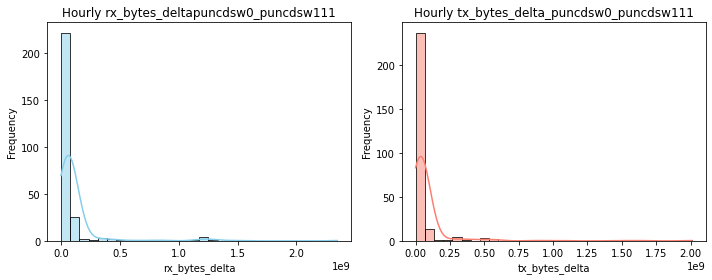

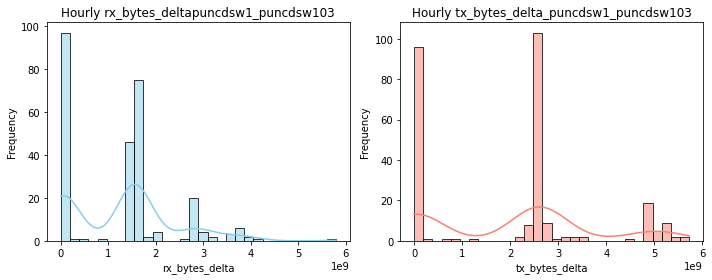

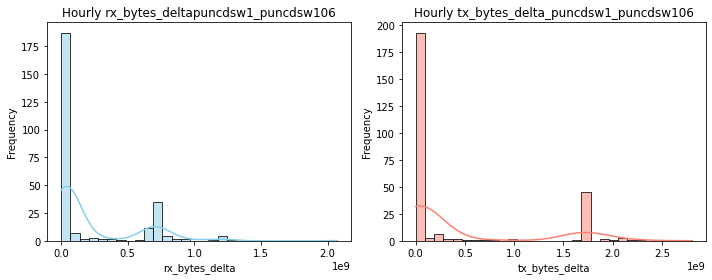

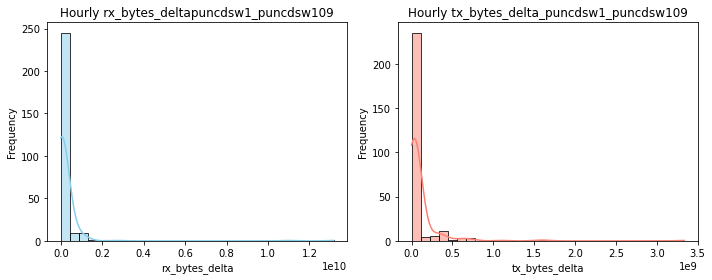

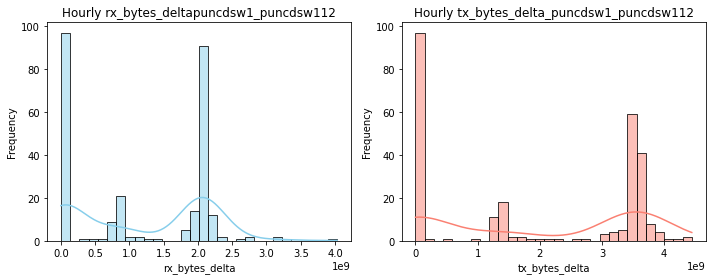

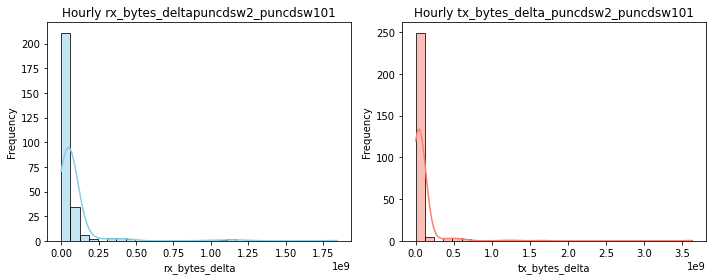

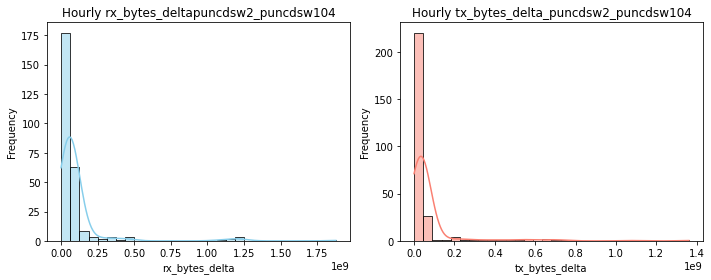

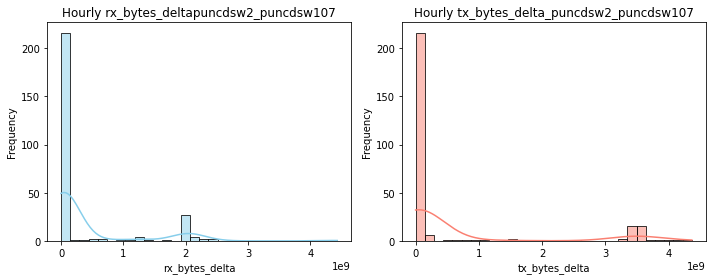

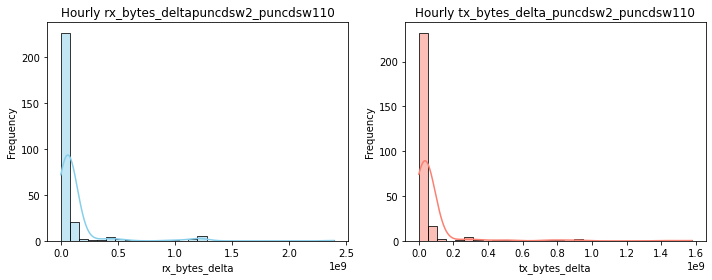

In [15]:
for i, site_host_key in enumerate(keep_list):
    # Filter the dataset for the current site-host combination
    sample_data = df[df['site_host'] == site_host_key]
    # Set 'ts' as the index
    sample_data = sample_data.set_index('ts')
    # Histograms for rx_bytes_delta and tx_bytes_delta
    plt.figure(figsize=(10, 4))
    
    hourly_data = sample_data.resample('H').sum()
    
    # Histogram for rx_bytes_delta
    plt.subplot(1, 2, 1)
    sns.histplot(hourly_data['rx_bytes_delta'], bins=30, kde=True, color='skyblue')
    chart_title = 'Hourly rx_bytes_delta'+site_host_key
    plt.title(chart_title)
    plt.xlabel('rx_bytes_delta')
    plt.ylabel('Frequency')
    
    # Histogram for tx_bytes_delta
    plt.subplot(1, 2, 2)
    sns.histplot(hourly_data['tx_bytes_delta'], bins=30, kde=True, color='salmon')
    chart_title = 'Hourly tx_bytes_delta_'+site_host_key
    plt.title(chart_title)
    plt.xlabel('tx_bytes_delta')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [19]:
remove_list_2 = ['puncdsw1_puncdsw109','puncdsw0_puncdsw111','puncdsw2_puncdsw101','puncdsw2_puncdsw104','puncdsw2_puncdsw110']

In [20]:
for comb in remove_list_2:
        print('removing comb',comb)
        keep_list.remove(comb)

removing comb puncdsw1_puncdsw109
removing comb puncdsw0_puncdsw111
removing comb puncdsw2_puncdsw101
removing comb puncdsw2_puncdsw104
removing comb puncdsw2_puncdsw110


In [21]:
len(keep_list)

11

In [35]:
df.set_index('ts',inplace=True)

In [41]:
hourly_data = df.groupby(['site', 'host','site_host']).resample('H').sum()

In [44]:
hourly_data.drop(columns=['host','site','site_host'],axis=1,inplace=True)

In [47]:
hourly_data.reset_index(inplace=True)

In [48]:
hourly_data = hourly_data[['ts','site','host','site_host','rx_bytes_delta','tx_bytes_delta']]

In [49]:
hourly_data.head()

ts      site         host             site_host  \
0 2024-03-15 15:00:00+00:00  puncdsc0  puncdscm101  puncdsc0_puncdscm101   
1 2024-03-15 16:00:00+00:00  puncdsc0  puncdscm101  puncdsc0_puncdscm101   
2 2024-03-15 17:00:00+00:00  puncdsc0  puncdscm101  puncdsc0_puncdscm101   
3 2024-03-15 18:00:00+00:00  puncdsc0  puncdscm101  puncdsc0_puncdscm101   
4 2024-03-15 19:00:00+00:00  puncdsc0  puncdscm101  puncdsc0_puncdscm101   

   rx_bytes_delta  tx_bytes_delta  
0    2.973456e+08    4.877477e+08  
1    3.496421e+09    5.724045e+09  
2    3.481487e+09    5.748031e+09  
3    3.491309e+09    5.654519e+09  
4    3.520958e+09    5.771298e+09

In [52]:
hourly_data.shape

(5874, 6)

In [53]:
# Count of records per site/host comb
counts_per_site_host = hourly_data.groupby(['site', 'host']).size().reset_index(name='count')

# looks for a single 
for cnt in counts_per_site_host['count'].unique():
    print(counts_per_site_host[counts_per_site_host['count'] == cnt].head(1))

       site         host  count
0  puncdsc0  puncdscm101    267


In [51]:
hourly_data.to_csv('netstats_hourly_4_3.csv',index=False)